## ANALYSIS AND PREDICTION OF BANK TERM DEPOSIT CUSTOMER SUBSCRIPTION

## INTRODUCTION
The importance of effective and efficient marketing strategies in the banking industry cannot be overemphasized. As financial institutions strive to attract and retain customers, the ability to identify and target individuals who are most likely to engage with their products and services becomes paramount. The utilization of data-driven approaches and advanced analytics techniques continues to be as a valuable tool for improving marketing campaign outcomes and enhancing overall success rates.

The focus of this project is to analyze the Portuguese bank marketing dataset and develop a predictive model to identify the factors that are most predictive of customer subscription to a term deposit. By understanding the key determinants of customer behavior and leveraging this knowledge, banks can refine their marketing strategies, optimize resource allocation, and increase their success rates in acquiring term deposit subscriptions.


## OBJECTIVES
The significance of this analysis lies in its potential to provide valuable insights into customer preferences, behaviors, and responses to marketing campaigns. By unraveling the factors that drive customer decision-making and identifying patterns within the dataset, banks can gain a competitive advantage in targeting their marketing efforts effectively. The proect aims to provide answers to the questions below:

1. **Objective**: To identify the factors that are most predictive of whether a customer will subscribe to a term deposit. 
    
    *Research questions: 
    Which features are most strongly associated with term deposit subscriptions? Are there any interactions or nonlinear 
    relationships between features that should be taken into account?* 
    
2. **Objective**: To develop a model that predicts whether a customer will subscribe to a term deposit with high accuracy. 

    *Research questions:
    Which machine learning algorithms are most appropriate for this task? How can we optimize the hyper-parameters of the 
    selected algorithm(s) to achieve the highest accuracy possible?*

3. **Objective**: To explore how the success of marketing campaigns varies with different demographic groups. 
    
   *Research questions:
       Do certain age, education, or occupation groups respond better to marketing campaigns than others? Are there any 
       regional or seasonal differences in campaign success rates? How can we adjust our marketing strategy to improve 
       subscription rates among specific demographic groups?*

4. **Objective**: To identify any trends or patterns in the data that may be useful for future marketing campaigns.

    *Research questions:
    Are there any temporal trends in the data that could be exploited for future campaigns? Are there any combinations of 
    features that are particularly effective at predicting term deposit subscriptions? Can we identify any subgroups of 
    customers that are particularly likely to subscribe to a term deposit, and target them with tailored marketing messages?*


In [1]:
#imoorting useful libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from imblearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset
df = pd.read_csv(r'C:\Users\User\Desktop\PROJECT\Bank Marketing\bank-additional-full.csv', sep = ';')
pd.set_option('display.max_columns', None)

### DATA WRANGLING

In [3]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [6]:
dobj = df.select_dtypes('object')

In [7]:
for names in dobj.columns:
    values = df[names].unique()
    print( f'{names} - {values}\n')

job - ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital - ['married' 'single' 'divorced' 'unknown']

education - ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default - ['no' 'unknown' 'yes']

housing - ['no' 'yes' 'unknown']

loan - ['no' 'yes' 'unknown']

contact - ['telephone' 'cellular']

month - ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week - ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome - ['nonexistent' 'failure' 'success']

y - ['no' 'yes']



#### OUTLIER DETECTION AND REMOVAL
The interquartile range method was used to remove outliers in the dataset. The method is a non-parametric approach, meaning it does not make assumptions about the underlying distribution of the data. It is applicable to both symmetric and skewed distributions, making it versatile for various types of datasets.

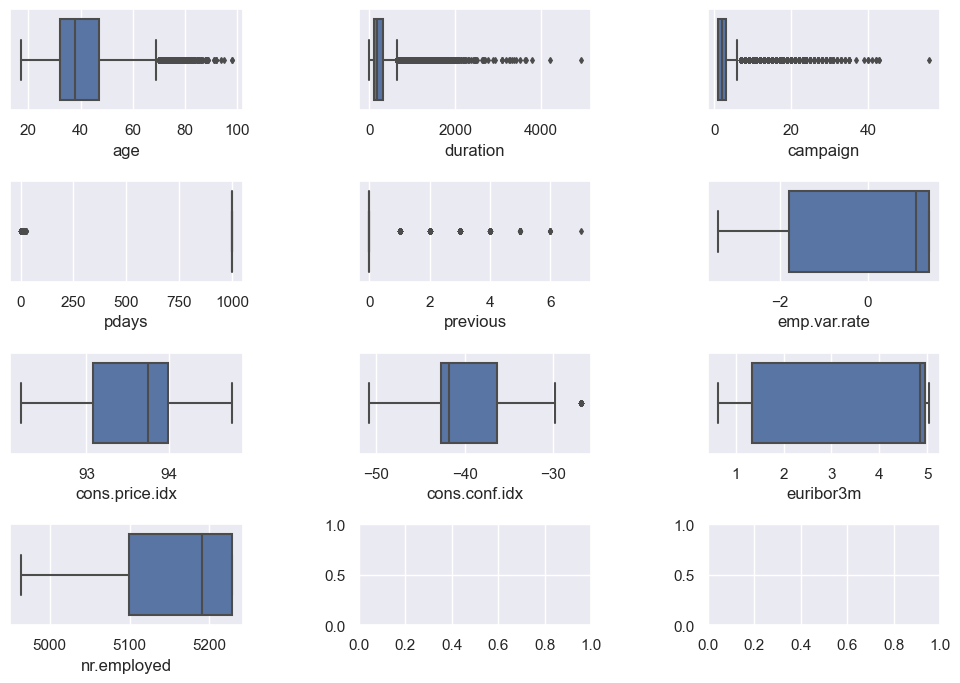

In [8]:
# check outliers in all numerical columns
fig, ax = plt.subplots(4,3, figsize=(12, 8))
fig.subplots_adjust(hspace=0.7, wspace=0.5)
for variable, subplot in zip(df.select_dtypes(['float64', 'int']).columns, ax.flatten()):
    sns.boxplot(df[variable], ax=subplot, fliersize=3)
plt.show()

In [9]:
# define a function to remove outliers based on two columns
def remove_outliers(df, col1, col2, col3, threshold):
    # calculate the IQR for each column
    Q1_col1, Q3_col1 = df[col1].quantile([0.25, 0.75])
    IQR_col1 = Q3_col1 - Q1_col1
    Q1_col2, Q3_col2 = df[col2].quantile([0.25, 0.75])
    IQR_col2 = Q3_col2 - Q1_col2
    Q1_col3, Q3_col3 = df[col3].quantile([0.25, 0.75])
    IQR_col3 = Q3_col3 - Q1_col3
    
    # remove outliers based on the IQR for each column
    data = df[(df[col1] >= Q1_col1 - threshold * IQR_col1) & (df[col1] <= Q3_col1 + threshold * IQR_col1)]
    data = df[(df[col2] >= Q1_col2 - threshold * IQR_col2) & (df[col2] <= Q3_col2 + threshold * IQR_col2)]
    data = df[(df[col3] >= Q1_col3 - threshold * IQR_col3) & (df[col3] <= Q3_col3 + threshold * IQR_col3)]
    
    return data

# call the function to remove outliers based on two columns
data = remove_outliers(df, 'age', 'duration', 'campaign', 1.5).reset_index(drop = True)

### EXPLORATORY DATA ANALYSIS

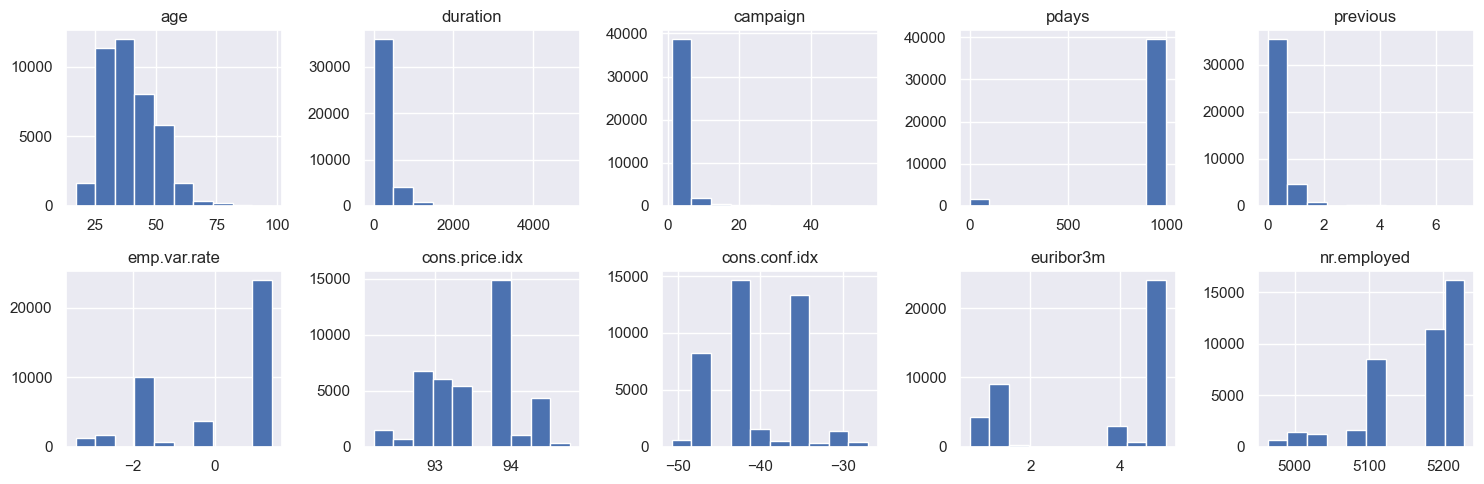

In [10]:
num_cols = df.select_dtypes(include=['int', 'float64'])

# Plot a histogram for each numerical column
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))
for ax, col in zip(axes.flatten(), num_cols.columns):
    ax.hist(num_cols[col], bins=10)
    ax.set_title(col)
plt.tight_layout()
plt.show()

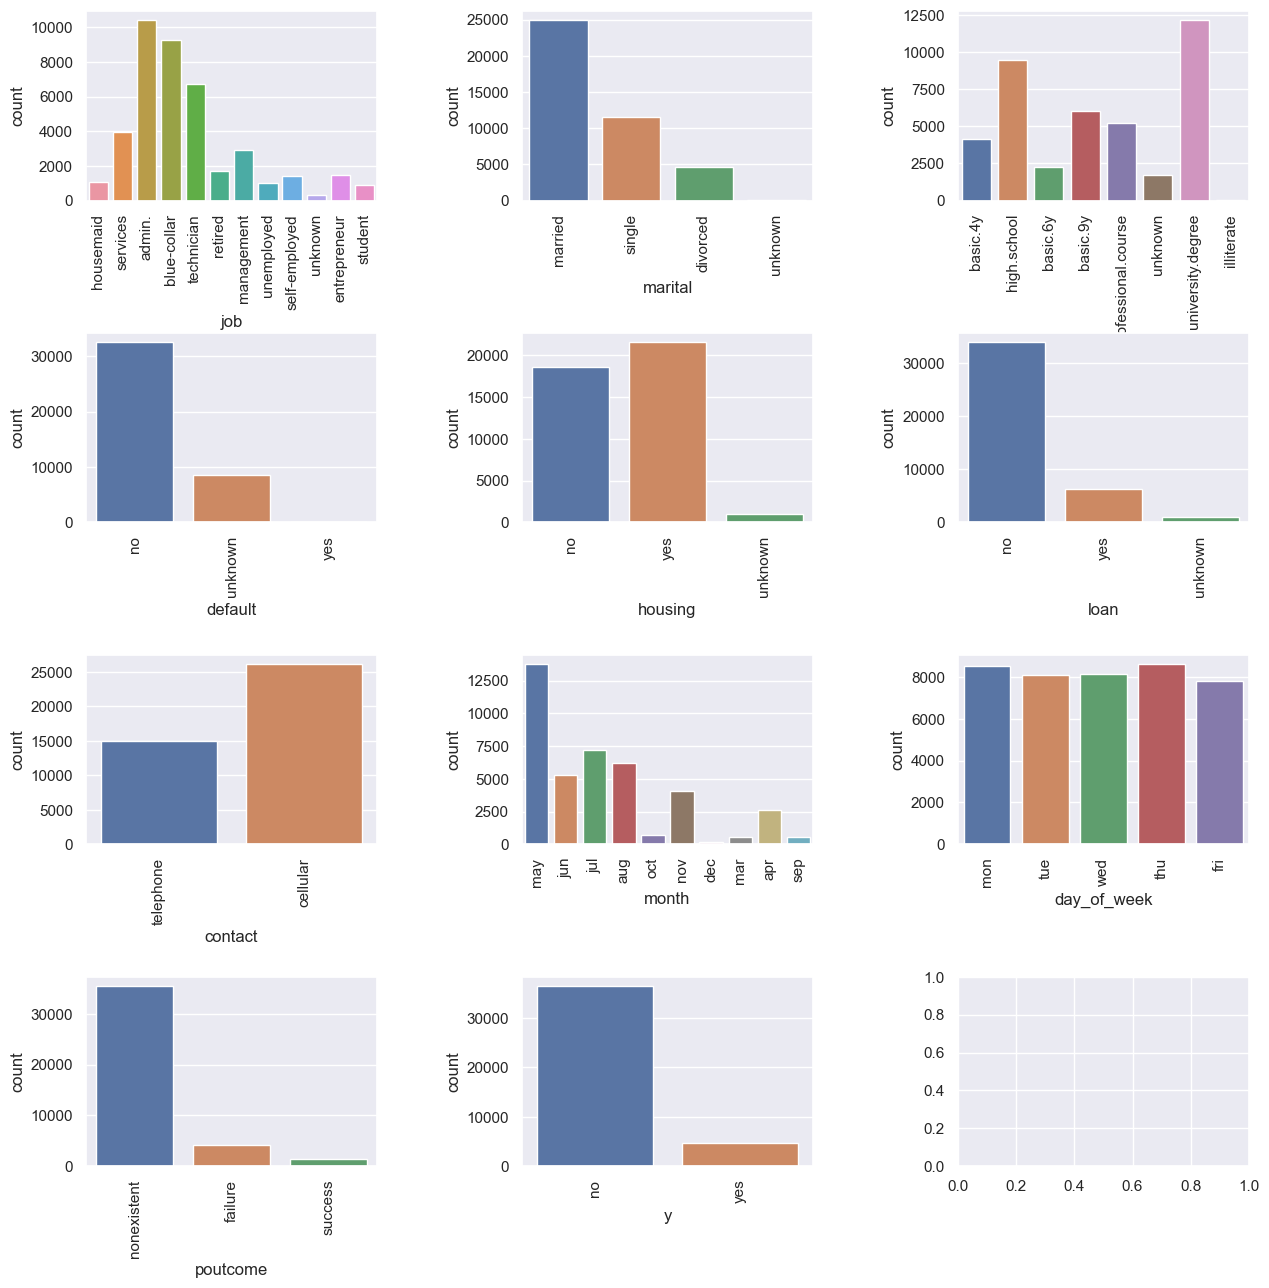

In [11]:
# bar plot of all categorical variables
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.7, wspace=0.5)

for variable, subplot in zip(df.select_dtypes('object').columns, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)
plt.show()

age skewness: 0.7846968157646645
age kurtosis: 0.7913115311544336
duration skewness: 3.263141255262832
duration kurtosis: 20.247938014978796
campaign skewness: 4.762506697067009
campaign kurtosis: 36.979795142898865
pdays skewness: -4.922189916418162
pdays kurtosis: 22.22946262635535
previous skewness: 3.8320422428611836
previous kurtosis: 20.108816215208236
emp.var.rate skewness: -0.7240955492472556
emp.var.rate kurtosis: -1.0626315246508407
cons.price.idx skewness: -0.23088765135788006
cons.price.idx kurtosis: -0.8298085771833406
cons.conf.idx skewness: 0.30317985874819237
cons.conf.idx kurtosis: -0.35855831054052567
euribor3m skewness: -0.7091879563778298
euribor3m kurtosis: -1.4068026223874996
nr.employed skewness: -1.044262407089151
nr.employed kurtosis: -0.0037603756956321455


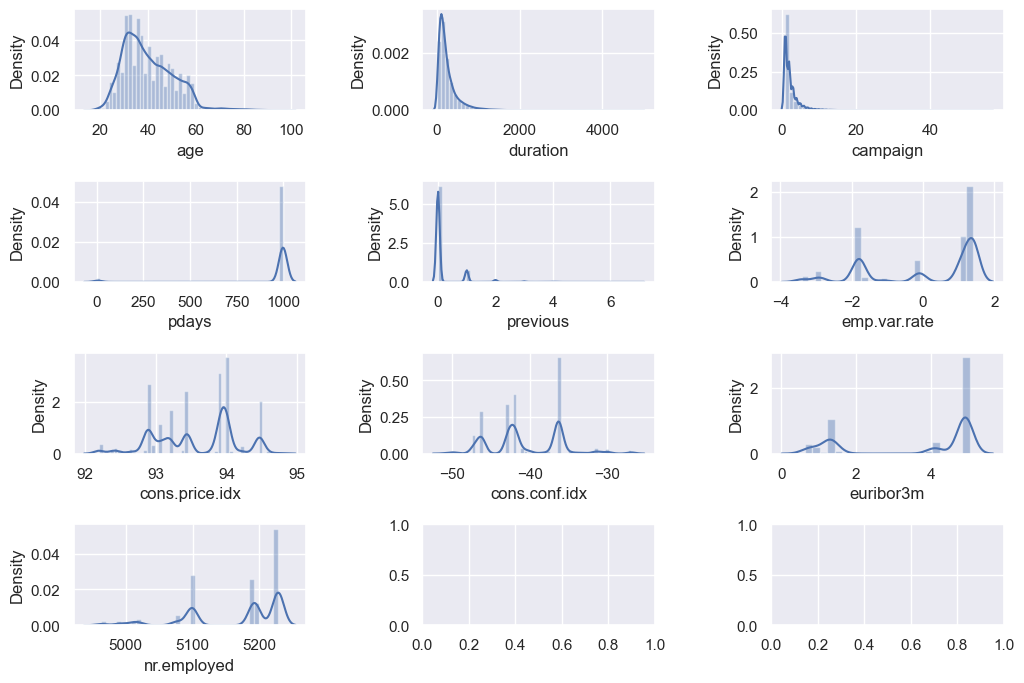

In [12]:
# distribution plot of all numerical columns
fig, ax = plt.subplots(4,3, figsize=(12, 8))
fig.subplots_adjust(hspace=0.7, wspace=0.5)
for variable, subplot in zip(df.select_dtypes(['float64', 'int']).columns, ax.flatten()):
    sns.distplot(df[variable], ax=subplot)
    print(variable, 'skewness:', df[variable].skew())
    print(variable, 'kurtosis:', df[variable].kurtosis())
plt.show()

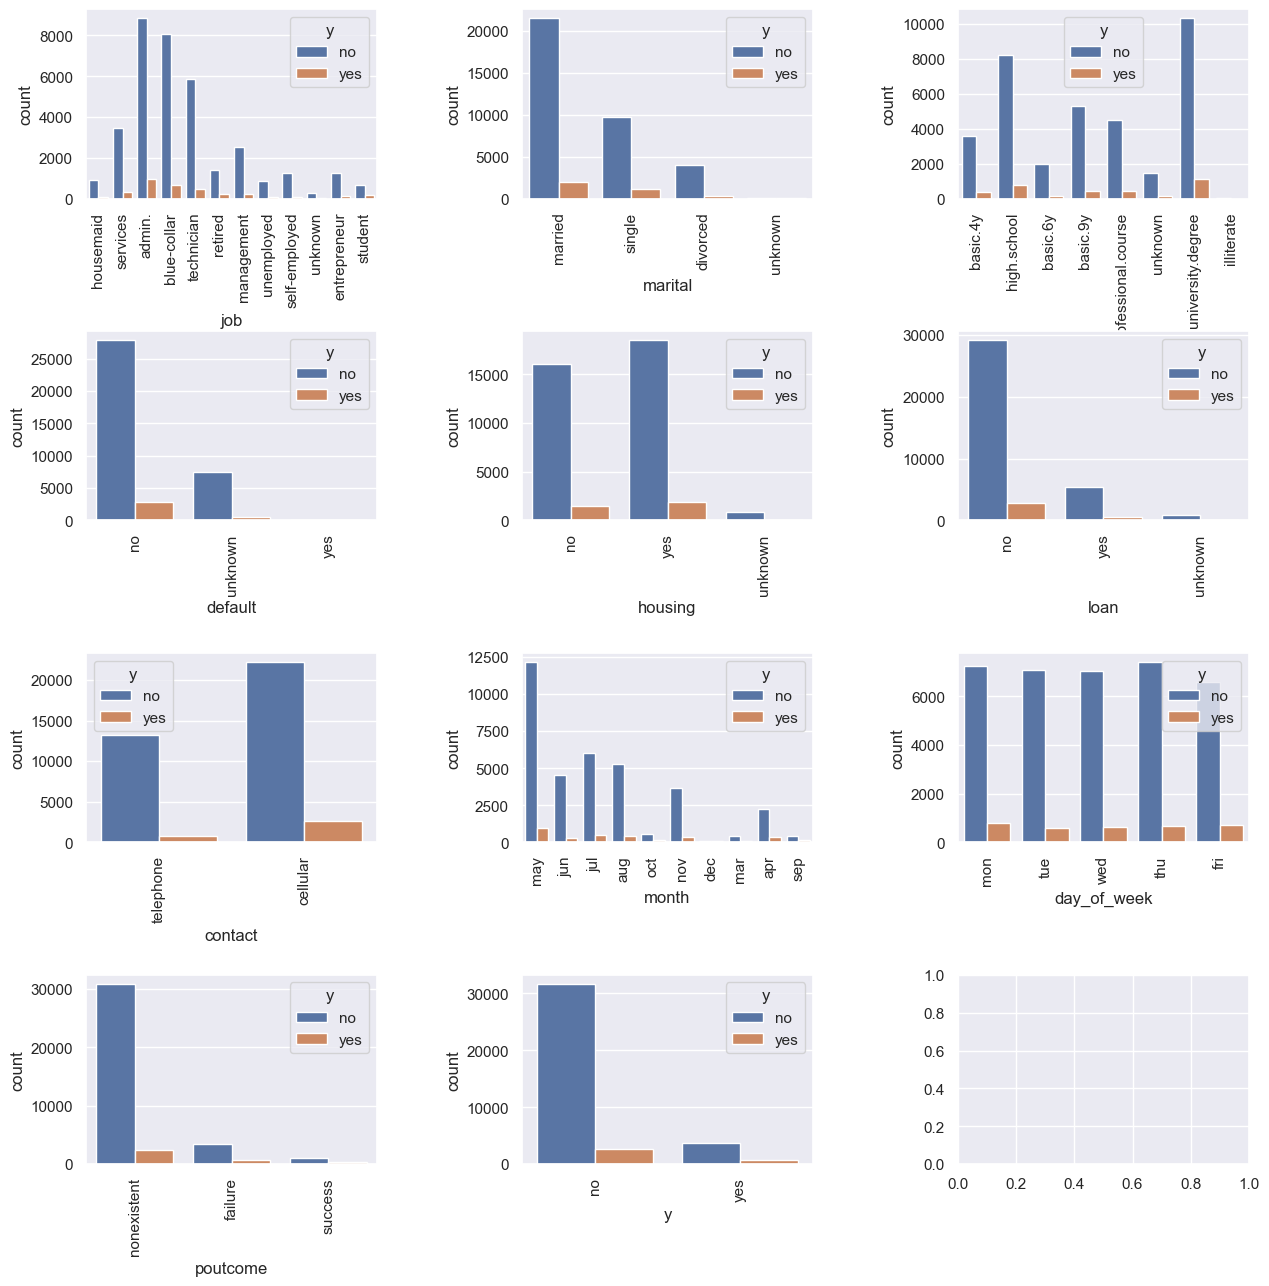

In [13]:
# check bar plots of all categorical variables with target variable
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.7, wspace=0.5)

# make plots
for variable, subplot in zip(data.select_dtypes('object').columns, ax.flatten()):
    sns.countplot(data[variable], hue=df['y'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Observation: 
As seen in the charts above, the term deposit subscription rate across the demographic factors of the customers is quite low with less than 25% success rate across all categories considered. Also from the banks perspective as shown in the previous chart majority of the customer were not contacted earlier to be informed or educated about the advantages of having a term deposit with the bank. This might have contributed to the low success rate of the customer subscription.

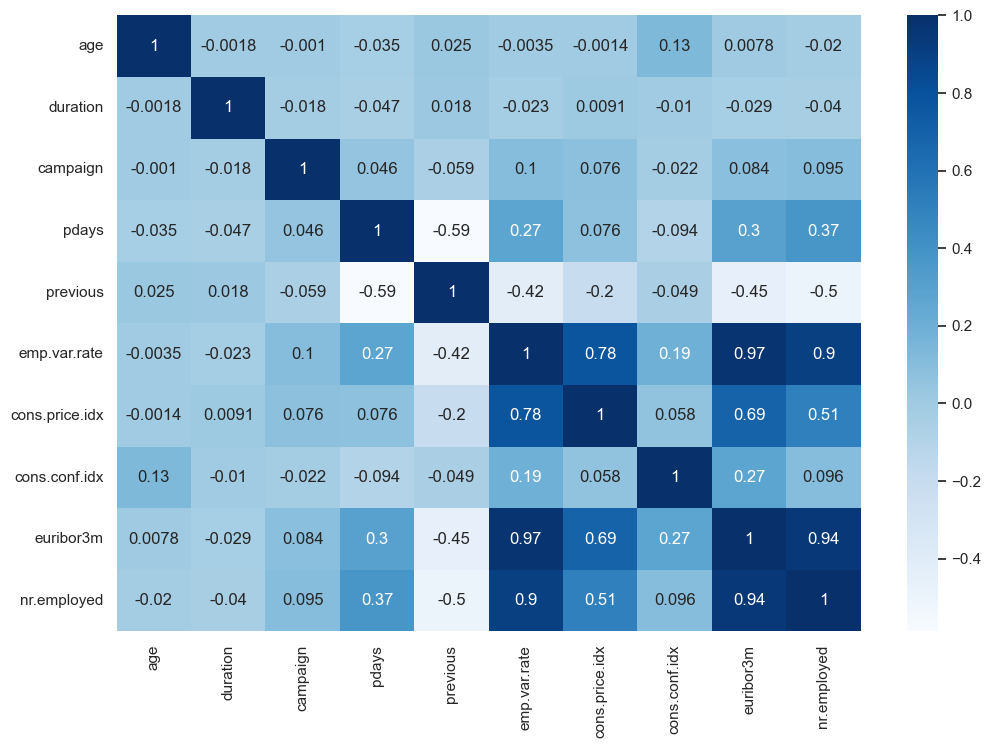

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.show()

**Observation**: From the heatmap above, it can be observed that the relationship between most numerical columns in our use case ranges from weakly/slightly postive to negative. Indicating a non-linear relationship. this means that there is some connection between the numerical columns, but the strength of this relationship is relatively low. The variables may have some influence on each other, but there are likely other factors at play that contribute to the overall behavior of the dataset. However, positive correlation is observed between economical factor such as employment variation rate and the other economical factors (consumer price index, consumer confidence index).

<Axes: >

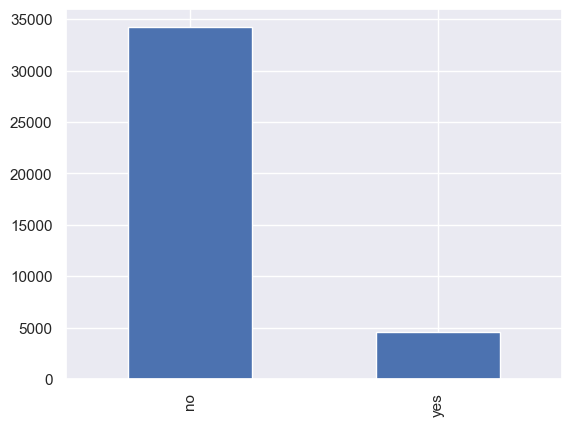

In [15]:
# check class distribution of target variable
data['y'].value_counts().plot(kind='bar')
plt.title('Target Class Distribution')

•	The distribution of the target variable was observed as shown in Figure 11 below and it was discovered to be imbalanced. The ratio of imbalance was 88:12 for not no to yes respectively. To overcome the class imbalance and improve the performance of the model on the minority class, We will SMOTTEEN (Synthetic Minority Over-sampling Technique for Over-sampling with Explicit ENN) which is an extension of the SMOTE algorithm, commonly used for oversampling imbalanced datasets. SMOTTEEN algorithm works by generating synthetic samples for the minority class by interpolating between existing minority class samples.

## Impact of economic factor on term deposit

Economic factors play a significant role in influencing the term deposit subscription rate. Economic conditions, such as employment rates, inflation, interest rates, and overall market stability, can impact individuals' financial decisions, including their willingness to invest in term deposits. In this section the impact of economic factors such as consumer confidence index, consumer price index, employment variation rate will be studied

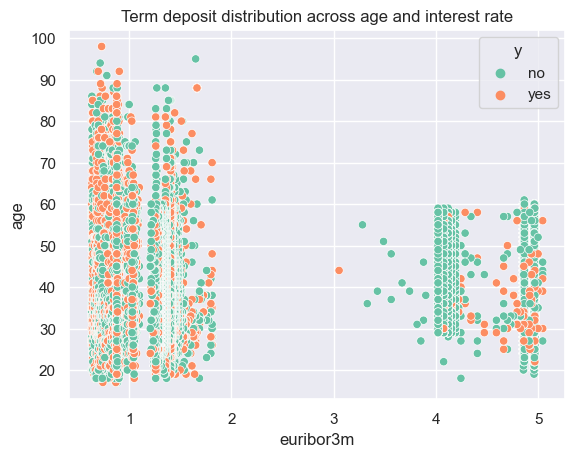

In [16]:
# scatter plot between age and euribor3m after removing outliers
sns.scatterplot(data = data, x="euribor3m", y="age", palette = 'Set2', hue = 'y')
plt.title('Term deposit distribution across age and interest rate')
plt.show()

### Observation:
The Euribor 3-month rate is a benchmark interest rate commonly used in European financial markets. As shown in the chart above, the subscription rate seems equally distributed across the interest rate. However, more customes were contacted by the bank when the interest rate is lower. This might be due to the cost-income management policy of the Bank because having a term deposit at higher interest rate can potentially impact the profitability and income margin of the bank. The bank's expenses will increase as it pays out more interest to customers, while its income from lending and other interest-bearing activities may not necessarily increase at the same rate

On the other hand, when the interest rates are higher, customers may have other investment opportunities or prefer more flexible financial products, such as investments in stocks or real estate, rather than locking their money in a term deposit.

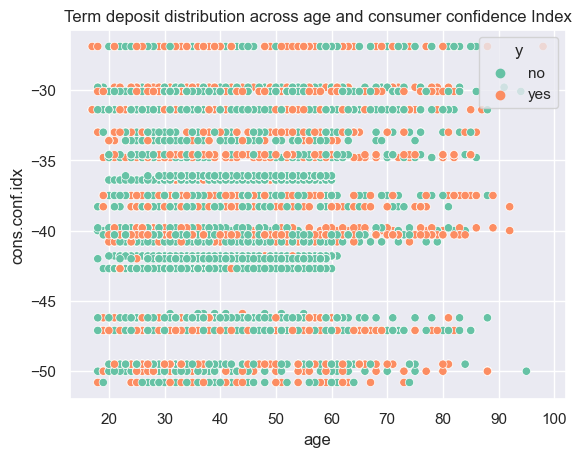

In [17]:
# scatter plot between consumer confidence index and age
sns.scatterplot(data = data, x="age", y="cons.conf.idx", palette = 'Set2', hue = 'y')
plt.title('Term deposit distribution across age and consumer confidence Index')
plt.show()

#### Observation
The Consumer Confidence Index (CCI) is a measurement that reflects the level of optimism or pessimism consumers have about the overall state of the economy and their personal financial situation. It is a key economic indicator that provides insights into consumer spending patterns and behavior.

As observed in the chart, the bank term deposit marketing campaign subscription is equally distributed across various Consumer Confidence Index levels, it implies that consumer confidence levels do not have a significant impact on the decision of customers to subscribe to the bank's term deposit.

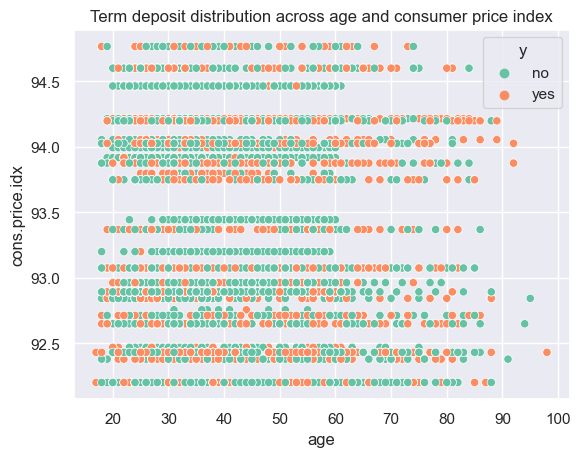

In [18]:
# scatter plot between lead time and avg price per room after removing outliers
sns.scatterplot(data = data, x="age", y="cons.price.idx", palette = 'Set2', hue = 'y')
plt.title('Term deposit distribution across age and consumer price index')
plt.show()

The Consumer Price Index (CPI) is a measure that tracks changes in the average prices of a basket of goods and services commonly purchased by households. It is used to assess inflation and measure the purchasing power of consumers over time. As shown in the chart above, the bank term deposit marketing campaign subscription is equally distributed across various Consumer Price Index (CPI) levels over the period considered, it implies that the campaign's success or the likelihood of customers subscribing to the term deposit is not significantly affected by changes in the overall price levels of goods and services.

In other words, the CPI, which represents the general level of prices in the economy, does not have a strong influence on the decision of customers to subscribe to the bank's term deposit. 

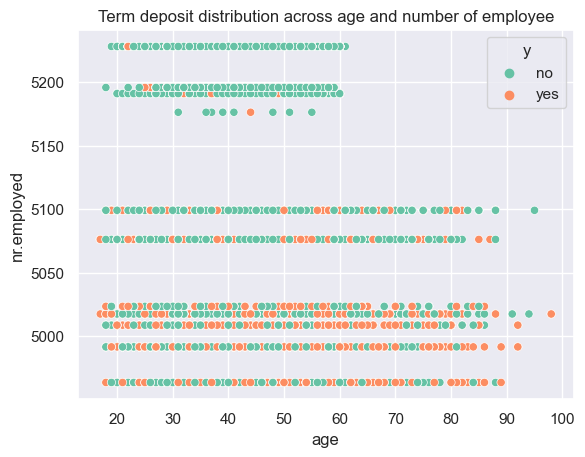

In [19]:
# scatter plot between age and number of employee
sns.scatterplot(data = data, x="age", y="nr.employed", palette = 'Set2', hue = 'y')
plt.title('Term deposit distribution across age and number of employee')
plt.show()

As seen in the chart, across all age bracket and at lower number of employee, there is an higher chance of a customer subscribing to bank deposit indicating a negative correlation. A possible explanation for this negative relationship could be that during periods of lower employment or when there are fewer employees, individuals may perceive the economic conditions as uncertain or unstable. In such situations, individuals may be more inclined to save and invest their money in secure financial instruments like bank term deposits. They may prioritize preserving their funds and seek the stability and guaranteed returns offered by term deposits.

Additionally, when there are fewer employees, it may indicate a more competitive job market or limited job opportunities. This could lead individuals to adopt a cautious approach towards their finances and prioritize long-term savings through term deposits.

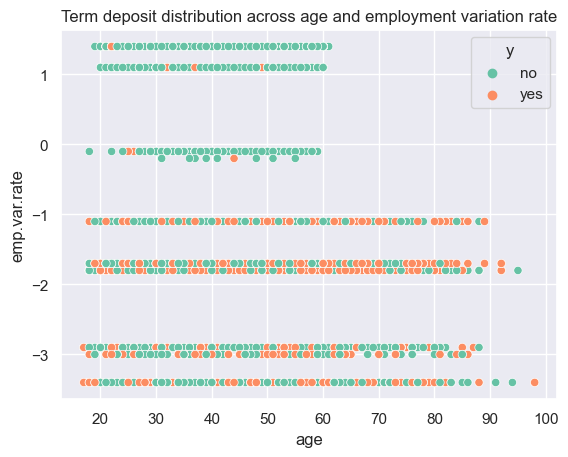

In [20]:
# scatter plot between lead time and avg price per room after removing outliers
sns.scatterplot(data = data, x="age", y="emp.var.rate", palette = 'Set2', hue = 'y')
plt.title('Term deposit distribution across age and employment variation rate')
plt.show()

The employment variation rate, also known as the employment volatility or employment growth rate, is an economic indicator that measures the percentage change in employment levels over a specific period of time. It reflects the rate at which the number of employed individuals in an economy is changing

As shown in the chart above, there is a negative relationship between the employment variation rate and Bank term deposit subscription, i.e: at highh employment variation rate, there is a lower subscription rate across all age bracket. This can be attributed to the fact that a higher employment variation rate, indicating higher volatility in the job market, can lead to lower consumer confidence and uncertainty about future income. In such cases, individuals may be less inclined to make long-term financial commitments like bank term deposits.

On the other hand, a Lower employment variation rate, indicating stability in the job market, can lead to higher consumer confidence and a sense of financial security. Individuals may be more willing to save and invest in bank term deposits as a secure long-term investment option

In [21]:
data.to_csv('bank_mar.csv', index = False)

# MACHINE LEARNING MODEL

In [22]:
#mapping the target variable
data['y'] = data.y.map({"no": 0, "yes": 1})

## Correlation Based Feature selection

For categorical columns

Chi-square test is commonly used for analyzing the relationship between two categorical variables. It helps to determine if there is a significant association between the two variables or not. In this case, the chi-square test is used to evaluate the relationship between the categorical feature variables and the target variable. It helps to determine if there is a statistically significant relationship between the feature variables and the target variable.

In [23]:
from scipy.stats import chi2_contingency

def chi_square_test(data, variable):
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(data[variable], data['y']))
    return chi2, p

for i in data.select_dtypes(['category', 'object']).columns:
    print(i, chi_square_test(data, i))

job (942.5878737879896, 4.312788282124058e-195)
marital (125.94005995821814, 4.054093155176709e-27)
education (191.01444100577902, 9.154870113867655e-38)
default (392.2254188004338, 6.750446138352515e-86)
housing (4.794330371397155, 0.09097548669802279)
loan (0.9187630543582201, 0.6316741980445599)
contact (836.173035911027, 7.372358337190211e-184)
month (2950.501718565276, 0.0)
day_of_week (29.247604057919805, 6.962259423933579e-06)
poutcome (4074.7542794561123, 0.0)


**Observation**: From the result above it can be seen that all our categorical varibales are stastically significant (with a p-value < 0.05) to the target except housing and loan which have a p-value greater than 0.05.

## Numerical features
For our numerical features, we assess the correlation with the target variable using Spearman rank correlation. This was done with the assumption that not all relationship was linear and normally distributed.

In [24]:
from scipy.stats import spearmanr
def spearman_test(data, variable):
    coef, p = spearmanr(data[variable], data['y'])
    return coef, p
for i in data.select_dtypes(['int', 'float']).columns:
    print(i, spearman_test(data, i))

age (-0.012713646369302152, 0.012288919813997375)
duration (0.3470836913701391, 0.0)
campaign (-0.04614709003588887, 9.690810539890338e-20)
pdays (-0.3292309275404474, 0.0)
previous (0.20234129022488925, 0.0)
emp.var.rate (-0.2517008304603492, 0.0)
cons.price.idx (-0.12162149925144185, 1.0721117214935255e-127)
cons.conf.idx (0.04285841932151476, 3.072408217562373e-17)
euribor3m (-0.27435866381131846, 0.0)
nr.employed (-0.2906640314033216, 0.0)
y (1.0, 0.0)


From the above it can be observed that with a p-value greater than 0.05, all the numerical features are statistically significant to the target variable.

## Dropping columns
There columns will be dropped from our data housing, loan and duration. The housing and loan have a p-value greater than 0.05, However, for the duration, it's stated that it can be discarded to build a good predictive model. 

duration: **last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model**.


In [25]:
#dropping columns
data.drop(columns = ['housing', 'loan', 'duration'], inplace = True)
feature = data.drop(columns = 'y')
target = data.y

In [26]:
numerical = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate','cons.price.idx', 'cons.conf.idx', \
             'euribor3m', 'nr.employed']

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
feature[numerical] = sc.fit_transform(feature[numerical])

In [28]:
# label encode categorical variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

label_dict = {}

for i in feature.select_dtypes(include = 'object').columns:
    feature[i] = le.fit_transform(feature[i])
    label_dict[i] = dict(zip(le.classes_, le.transform(le.classes_)))

In [29]:
X = feature
y = target

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# define the stratified k-fold cross validation object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# define the machine learning models to use
models = [
    LogisticRegression(),
    SVC(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier(),
    GaussianNB()
]

# create an empty DataFrame to store the evaluation metrics
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'])

# loop through each model and perform cross validation
for model in models:
    scores = []
    precisions = []
    recalls = []
    f1_scores = []
    roc_aucs = []
    
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.to_numpy()[train_index], X.to_numpy()[test_index]
        y_train, y_test = y.to_numpy()[train_index], y.to_numpy()[test_index]
        
        sme = SMOTEENN(random_state=42)
        X_train_res, y_train_res = sme.fit_resample(X_train, y_train)
        
        # fit the model on the training set and make predictions on the test set
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)
        
        # calculate evaluation metrics for this fold
        score = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        
        # store the evaluation metrics for this fold
        scores.append(score)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)
        roc_aucs.append(roc_auc)
    
    # calculate the average evaluation metrics across all folds for this model
    avg_score = np.mean(scores)
    avg_precision = np.mean(precisions)
    avg_recall = np.mean(recalls)
    avg_f1 = np.mean(f1_scores)
    avg_roc_auc = np.mean(roc_aucs)
    
    # add the evaluation metrics for this model to the results DataFrame
    results_df = results_df.append({
        'Model': type(model).__name__,
        'Accuracy': avg_score,
        'Precision': avg_precision,
        'Recall': avg_recall,
        'F1-score': avg_f1,
        'ROC AUC': avg_roc_auc
    }, ignore_index=True)

                        Model  Accuracy  Precision    Recall  F1-score  \
0          LogisticRegression  0.774251   0.297741  0.685805  0.415134   
1                         SVC  0.804832   0.332724  0.661957  0.442389   
2      RandomForestClassifier  0.854520   0.413419  0.586003  0.484693   
3  GradientBoostingClassifier  0.858027   0.424004  0.600796  0.497058   
4               XGBClassifier  0.870920   0.457516  0.565688  0.505749   
5                  GaussianNB  0.735109   0.262998  0.703686  0.382891   

    ROC AUC  
0  0.735875  
1  0.742840  
2  0.738014  
3  0.746417  
4  0.738483  
5  0.721475  


In [32]:
results_df

Model  Accuracy  Precision    Recall  F1-score  \
0          LogisticRegression  0.774251   0.297741  0.685805  0.415134   
1                         SVC  0.804832   0.332724  0.661957  0.442389   
2      RandomForestClassifier  0.854520   0.413419  0.586003  0.484693   
3  GradientBoostingClassifier  0.858027   0.424004  0.600796  0.497058   
4               XGBClassifier  0.870920   0.457516  0.565688  0.505749   
5                  GaussianNB  0.735109   0.262998  0.703686  0.382891   

    ROC AUC  
0  0.735875  
1  0.742840  
2  0.738014  
3  0.746417  
4  0.738483  
5  0.721475

From the above, it can be observed that XGBoost gave the highest Accuracy, Precision and F1-Score. So, it will be the chosen ML algorithm. 

### HYPERPARAMETER TUNNING

In [33]:
model = models[4]
sme = SMOTEENN(random_state=42)
X_res, y_res = sme.fit_resample(X, y)

# param grid
param_grid = {
    'max_depth': [None, 3, 6, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [None, 50, 100, 500]
}

# grid search
grid_search = GridSearchCV(model, param_grid, scoring='f1_macro', cv=skf, n_jobs=-1, verbose=True)
grid_search.fit(X_res, y_res)

# best model
best_model = grid_search.best_estimator_
print(grid_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 500}


F1: 0.489322191272052
Accuracy: 0.8581926002320485
ROC AUC: 0.7382187966307749
Recall: 0.5816777041942605
precision: 0.422275641025641
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      6851
           1       0.42      0.58      0.49       906

    accuracy                           0.86      7757
   macro avg       0.68      0.74      0.70      7757
weighted avg       0.88      0.86      0.87      7757



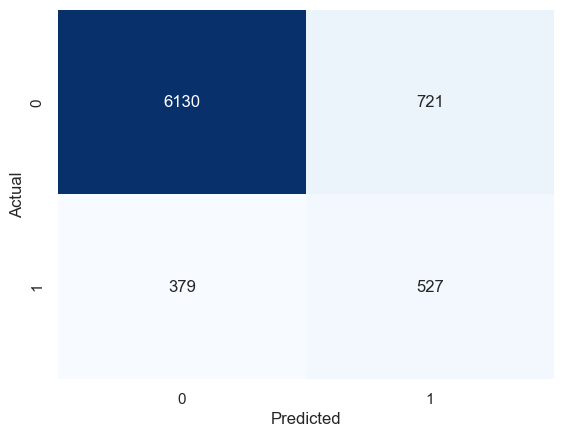

In [34]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# undersample training data
sme = SMOTEENN(random_state=42)
X_train_res, y_train_res = sme.fit_resample(X_train, y_train)

# fit model on training data
best_model.fit(X_train_res, y_train_res)

# get predictions on test data
y_pred = best_model.predict(X_test)

# print scores
print('F1:', f1_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC AUC:', roc_auc_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))

# get classification report
print(classification_report(y_test, y_pred))

# get confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [35]:
# feature importance

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
feature_importance.sort_values(by = 'Importance', ascending = False, inplace = True)
feature_importance

Feature  Importance
16     nr.employed    0.453327
12    emp.var.rate    0.289628
8         campaign    0.037773
5          contact    0.034249
9            pdays    0.032425
4          default    0.028246
14   cons.conf.idx    0.019824
15       euribor3m    0.017956
13  cons.price.idx    0.013699
10        previous    0.013064
6            month    0.012081
0              age    0.011990
11        poutcome    0.010248
7      day_of_week    0.007305
2          marital    0.006854
1              job    0.005718
3        education    0.005613

## LEARNER BASED FEATURE SELECTION METHOD.

Recursive Feature Elimination (RFE): It is a feature selection technique used in machine learning to select the most relevant features from a given dataset.

The RFE algorithm works by recursively eliminating features and building models based on the remaining features. It starts by training a model on the entire set of features and assigning weights or importance values to each feature. Then, it removes the least important feature(s) and repeats the process on the reduced feature set. This recursive elimination continues until a specified number of features remains.

During each iteration, the algorithm evaluates the performance of the model using a predefined metric (e.g., accuracy, F1-score, etc.) and selects the features that contribute the most to the model's performance

In [59]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification


# Specify the number of features to select
n_features = 10

# Perform RFE
rfe = RFE(estimator=model, n_features_to_select=n_features)
X_selected = rfe.fit_transform(X, y)

# Get the selected feature indices
feature_indices = rfe.get_support(indices=True)

In [60]:
feature_indices

array([ 4,  5,  6,  7,  9, 11, 12, 14, 15, 16], dtype=int64)

In [61]:
selected_features = [X.columns[i] for i in feature_indices]

#selecting the rfe features from the whole dataset
Xrfe = data[selected_features]

In [62]:
Xrfe

default    contact month day_of_week  pdays     poutcome  emp.var.rate  \
0           no  telephone   may         mon    999  nonexistent           1.1   
1      unknown  telephone   may         mon    999  nonexistent           1.1   
2           no  telephone   may         mon    999  nonexistent           1.1   
3           no  telephone   may         mon    999  nonexistent           1.1   
4           no  telephone   may         mon    999  nonexistent           1.1   
...        ...        ...   ...         ...    ...          ...           ...   
38777       no   cellular   nov         fri    999  nonexistent          -1.1   
38778       no   cellular   nov         fri    999  nonexistent          -1.1   
38779       no   cellular   nov         fri    999  nonexistent          -1.1   
38780       no   cellular   nov         fri    999  nonexistent          -1.1   
38781       no   cellular   nov         fri    999      failure          -1.1   

       cons.conf.idx  euribor3m  nr.employed  
0              -36.4      4.857       5191.0  
1              -36.4      4.857       5191.0  
2              -36.4      4.857       5191.0  
3              -36.4      4.857       5191.0  
4              -36.4      4.857       5191.0  
...              ...        ...          ...  
38777          -50.8      1.028       4963.6  
38778          -50.8      1.028       4963.6  
38779          -50.8      1.028       4963.6  
38780          -50.8      1.028       4963.6  
38781          -50.8      1.028       4963.6  

[38782 rows x 10 columns]

F1: 0.47392290249433106
Accuracy: 0.8803661209230372
ROC AUC: 0.7034171564519931
Recall: 0.47446083995459704
precision: 0.4733861834654587
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6876
           1       0.47      0.47      0.47       881

    accuracy                           0.88      7757
   macro avg       0.70      0.70      0.70      7757
weighted avg       0.88      0.88      0.88      7757



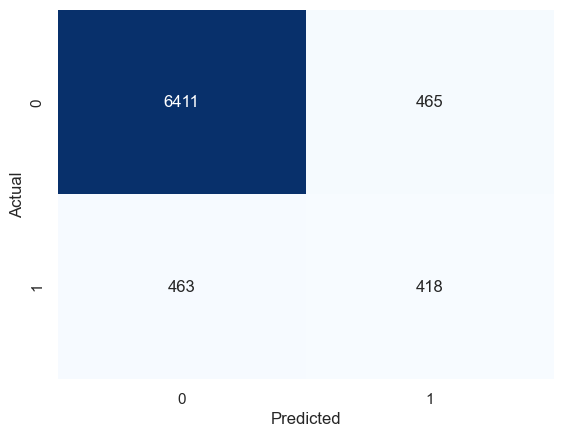

In [63]:
selected_features = [X.columns[i] for i in feature_indices]

#selecting the rfe features from the whole dataset
Xrfe = data[selected_features]
Classes = data.y

# label encode categorical variables
label = LabelEncoder()

label_dics = {}

for i in Xrfe.select_dtypes(include = 'object').columns:
    Xrfe[i] = label.fit_transform(Xrfe[i])
    label_dics[i] = dict(zip(label.classes_, label.transform(label.classes_)))
    
    
#standardizing the numerical columns
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
Xr = scale.fit_transform(Xrfe)




#splitting the dataset
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, Classes, test_size=0.2, random_state=42)



# undersample training data
smot = SMOTEENN(random_state=42)
Xr_train_res, yr_train_res = smot.fit_resample(Xr_train, yr_train)

# fit model on training data
model = best_model
model.fit(Xr_train_res, yr_train_res)

# get predictions on test data
yr_pred = model.predict(Xr_test)

# print scores
print('F1:', f1_score(yr_test, yr_pred))
print('Accuracy:', accuracy_score(yr_test, yr_pred))
print('ROC AUC:', roc_auc_score(yr_test, yr_pred))
print('Recall:', recall_score(yr_test, yr_pred))
print('precision:', precision_score(yr_test, yr_pred))

# get classification report
print(classification_report(yr_test, yr_pred))

# get confusion matrix heatmap
cm = confusion_matrix(yr_test, yr_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [64]:
# feature importance

feature_importan = pd.DataFrame({'Feature': Xrfe.columns, 'Importance': model.feature_importances_})
feature_importan.sort_values(by = 'Importance', ascending = False, inplace = True)
feature_importan

Feature  Importance
9    nr.employed    0.883979
4          pdays    0.031672
7  cons.conf.idx    0.018228
2          month    0.015127
6   emp.var.rate    0.011637
0        default    0.011408
3    day_of_week    0.010400
8      euribor3m    0.006588
1        contact    0.006269
5       poutcome    0.004692

## Result Evaluation and Discussion:

| Metrics       | Class | Model   | Model 2(rfe selection Model)|
|-----------    |-------|---------|--------------------|
| **Precision** |   0   |0.94     |0.94     |
|               |   1   |0.42     |0.47     |
| **Recall**    |   0   |0.89     |0.93     |
|               |   1   |0.58     |0.50     |
| **F1-Score**  |   0   |0.92     |0.93     |
|               |   1   |0.48     |0.48     |
| **Accuracy**  |       |0.74     |0.71     |
| **ROC-AUC**   |       |0.86     |0.88     |

The table above shows the evaluation metrics for the models: 
Model 1 uses majority of the features while the other used the Recursive Feature Selection (RFE) method. Here is a brief explanation of the performance metrics.

- **Precision**: Model 1 achieves a precision of 0.94 for class 0 and 0.42 for class 1, indicating that it has a high ability to correctly identify true negatives but performs poorly in identifying true positives. Model 2, with RFE selection, improves the precision for class 1 to 0.47 while maintaining a high precision for class 0.

- **Recall**: Model 1 has a recall of 0.89 for class 0 and 0.58 for class 1, suggesting that it effectively captures a high percentage of true negatives but misses a significant number of true positives. Model 2 is less successful in correctly identifying true positive cases for the minority class (subscription) compared to Model 1 although it maintained a high recall for class 0 (0.93).

- **F1-Score**: The F1-score combines precision and recall, providing a balanced measure of model performance. Model 1 achieves an F1-score of 0.92 for class 0 and 0.48 for class 1. Model 2, with RFE selection, maintains a similar F1-score for class 0 (0.93) and class 1 (0.48).

- **Accuracy**: Model 1 has an overall accuracy of 0.74, indicating that it correctly predicts 74% of the samples. Model 2 achieves a slightly lower accuracy of 0.71, suggesting that the RFE-selected features may have a minor impact on overall accuracy.


- **ROC-AUC**: Model 1 achieves an ROC-AUC score of 0.86, indicating a good ability to distinguish between the positive and negative classes. Model 2 performs slightly better with an ROC-AUC score of 0.88.

Overall, Model 2 with RFE selection shows improvements in precision, recall, and ROC-AUC for class 1, indicating a better ability to identify positive instances.

### ANSWERS TO RESEARCH QUESTIONS

1. **Objective: To identify the factors that are most predictive of whether a customer will subscribe to a term deposit**.
    **Research questions**:
   - Which features are most strongly associated with term deposit subscriptions?
   - Are there any interactions or nonlinear relationships between features that should be taken into account?

**Answer**: Based on the result of the analysis, the "nr.employed" (number of employees) feature has the highest importance in predicting term deposit subscriptions, followed by "pdays" (number of days that passed by after the client was last contacted from a previous campaign) and "cons.conf.idx"(consumer confidence index). These features show a significant association with the subscription outcome. Additionally, there are nonlinear relationships observed between some numerical features and the target variable, the non-linear relationships was considered while building the model.


2. **Objective: To develop a model that predicts whether a customer will subscribe to a term deposit with high accuracy**.

   **Research questions**:
   - Which machine learning algorithms are most appropriate for this task?
   - How can we optimize the hyperparameters of the selected algorithm(s) to achieve the highest accuracy possible?

**Answer**: Five different machine learning models were considered and validated, XGBoost performed the best in terms of accuracy. This algorithm can be considered appropriate for predicting term deposit subscriptions. To optimize the hyperparameters, I utilized GridSearchCV, which is a reliable technique for finding the best combination of hyperparameters for a given model. By tuning the hyperparameters, the accuracy and model's predictive performance improved.

3. **Objective: To explore how the success of marketing campaigns varies with different demographic groups**.

   **Research questions**:
   - Do certain age, education, or occupation groups respond better to marketing campaigns than others?
   - Are there any regional or seasonal differences in campaign success rates?
   - How can we adjust our marketing strategy to improve subscription rates among specific demographic groups?

   **Answer**: To analyze the success of marketing campaigns across demographic groups, I considered the relationship between age and certain economkcal factors such employment variation rate, consumer confidence index with term deposit subscriptions. From the analysis, it can be observed that at lower employment variation rates and lower consumer confidence index across all age brackets there is a higher likelihood of subscribing to term deposits. This implies that specific demographic groups, such as those with more stable employment respond better to the marketing campaigns. Adjusting the marketing strategy to target these specific demographic groups may lead to improved subscription rates.

4. **Objective: To identify any trends or patterns in the data that may be useful for future marketing campaigns**.

   **Research questions**:
   - Are there any temporal trends in the data that could be exploited for future campaigns?
   - Are there any combinations of features that are particularly effective at predicting term deposit subscriptions?
   - Can we identify any subgroups of customers that are particularly likely to subscribe to a term deposit and target them with tailored marketing messages?

   **Answer**: The analysis of the dataset revealed that the term deposit subscription rate was low across all categories considered. However, certain features, such as "nr.employed," "pdays," and "cons.conf.idx," were found to be important for predicting term deposit subscriptions. These insights can be utilized for future marketing campaigns by targeting customers with specific characteristics or combinations of features that have a higher likelihood of subscribing to term deposits. Tailored marketing messages can be designed to appeal to these subgroups and increase the effectiveness of the campaigns.

## RECOMMENDATIONS.

Based on the result of the analysis, here are some recommendations.

1. Educate customers about the advantages of term deposits: The low subscription rate suggests that many customers may not be aware of the benefits and advantages of having a term deposit with the bank. Therefore, the bank should invest in educational campaigns to inform customers about the security, and long-term savings benefits of term deposits.

2. Enhance customer engagement during the campaign: The Bank should improve the communication and engagement strategies for the marketing campaigns. Emphasize personalized messages and offers that align with customers' needs and preferences. There should also be a mix of communication channels, such as phone calls, emails, and social media, to reach a wider audience

3. Continuously monitor and analyze data: The Bank should regularly track the success rates of marketing campaigns across different time periods, regions, and demographic groups to identify any emerging trends, patterns, or changing customer preferences. This will help you refine your marketing strategies and make data-driven decisions

4. Consider customer feedback: Collect feedback from customers who have subscribed to term deposits and understand their motivations and preferences. This information can be used to further optimize marketing campaigns and improve customer satisfaction.

5. Invest in customer retention: The Bank should not only focus on acquiring new customers but also on retaining existing ones. Develop strategies to nurture and maintain long-term relationships with term deposit customers. Offer loyalty programs, additional benefits, and personalized services to encourage customers to continue their term deposits with the bank

### Limitations

1. The analysis may not capture or consider other external factors that could influence customer behavior and campaign success rates such as customer income bracket, regulatory changes, competitive dynamics, or other external variables.

2. The imbalanced distribution of the dataset may not accurately reflect the distribution in the broader population. Consequently, the model's performance on new data, especially for the minority class, may be suboptimal.

2. The market and customer behavior are constantly evolving. Therefore, It's important to regularly review and update the analysis to account for changing dynamics and new data

In [65]:
# save model for deployment

import pickle

#save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
    

# save scaler for deployment
with open('scale.pkl', 'wb') as f:
    pickle.dump(scale, f)


# save label dictionary for deployment
with open('label_dics.pkl', 'wb') as f:
    pickle.dump(label_dics, f)


In [53]:
Xrfe.head(1)

education  default  contact  month  day_of_week  pdays  poutcome  \
0          0        0        1      6            1    999         1   

   emp.var.rate  cons.conf.idx  euribor3m  nr.employed  
0           1.1          -36.4      4.857       5191.0

In [45]:
data.head(1)

age        job  marital education default    contact month day_of_week  \
0   56  housemaid  married  basic.4y      no  telephone   may         mon   

   campaign  pdays  previous     poutcome  emp.var.rate  cons.price.idx  \
0         1    999         0  nonexistent           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  
0          -36.4      4.857       5191.0  0